# Objective
- The analysis primarily investigates factors influencing customer churn focusing on every services, gender, contract and payments types.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv(r"D:\analytics\data\Telco-Customer-Churn.csv")

In [123]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and total charges are recorded
#change dtypes object to float

In [125]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0") 
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [126]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [127]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [128]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [129]:
df.duplicated().sum()

0

In [130]:
df["customerID"].duplicated().sum()# unique id should never be dup

0

#Converted 0 & 1 values of senior citizen to yes/no to make it easier to understand

In [131]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [132]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


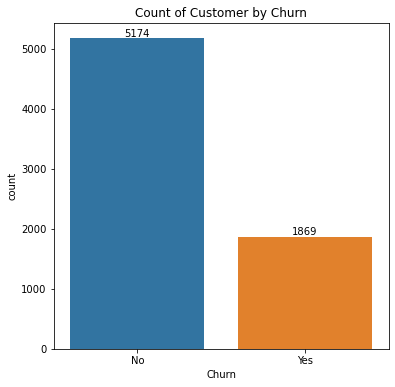

In [133]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x= 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customer by Churn')
plt.show()

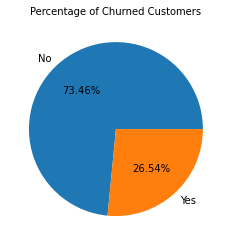

In [134]:
plt.figure(figsize=(4,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
gb
plt.pie(gb['Churn'], labels = gb.index, autopct= '%1.2f%%')
plt.title('Percentage of Churned Customers', fontsize = 10)
plt.show()

In [135]:
# From the given pie chart we can conclude that 26.54% of customer churned out/ left.

# Explore the reason behind for churned out

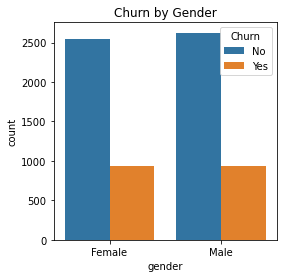

In [136]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data= df, hue="Churn")
plt.title("Churn by Gender")
plt.show()

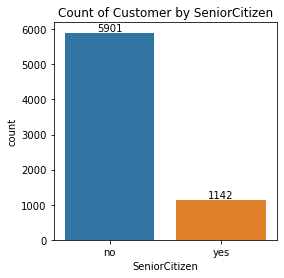

In [137]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data= df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by SeniorCitizen")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

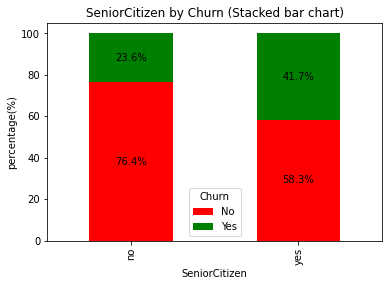

In [138]:
total_counts= df.groupby("SeniorCitizen")['Churn'].value_counts(normalize = True).unstack()*100
ax1=total_counts.plot(kind="bar", stacked = True, color= ["red","green"],fig=(4,2))
plt.title("SeniorCitizen by Churn (Stacked bar chart)")
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', label_type='center')
plt.xlabel('SeniorCitizen')
plt.ylabel('percentage(%)')
plt.show

Comparatively greater percentage people of senior citizen category have churned out.

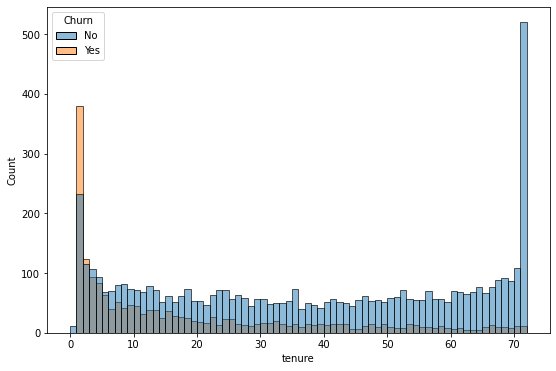

In [139]:
plt.figure(figsize=(9,6))
sns.histplot(x='tenure', data = df, bins=72, hue = 'Churn')
plt.show()

People who have used our services for long time have stayed and people who have used our services for 1 or 2 month have churned.   

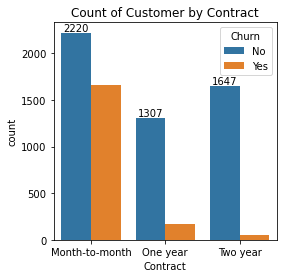

In [140]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data= df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()


People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [141]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [142]:
#lets create subplots of the services ie PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'. using chatgpt

IndentationError: unexpected indent (1240761757.py, line 2)

In [ ]:
services = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(services):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


The majority of customers who donot churn tend to have services like PhoneService, Internet service (Praticuraly DSL), and OnlineSecurity enabled. For services like OnlineBackup,TechSupport, and streamingTv, churn rates are noticeably higher when these services are not being used or are unavailable.

In [ ]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data= df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customer by PaymentMethod")
plt.xticks(rotation = 45) #shows xaxis lables in 45 degree
plt.show()

Customer is likely to churn when he is using electroinc check as a payment method.